## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
pd.DataFrame(boston.data, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
#查看資料說明
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [89]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X = pd.DataFrame(boston.data, columns=boston.feature_names)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
from sklearn.metrics import mean_squared_error

print("Mean squared error: %.2f" %mean_squared_error(y_test, regr.predict(x_test)))

Mean squared error: 17.04


In [91]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
470,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24.0,666.0,20.2,396.90,16.29
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12


In [92]:
#特徵重要性
for i,v in enumerate(regr.coef_):
    print(boston.feature_names[i]+':  %.5f' % v)

CRIM:  -0.12586
ZN:  0.04843
INDUS:  0.01841
CHAS:  3.08510
NOX:  -17.32770
RM:  3.61675
AGE:  0.00219
DIS:  -1.49361
RAD:  0.31998
TAX:  -0.01273
PTRATIO:  -0.92747
B:  0.00951
LSTAT:  -0.53359


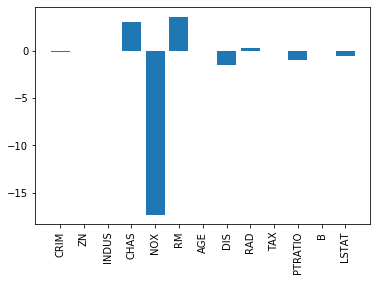

In [93]:
plt.bar([x for x in range(len(regr.coef_))], regr.coef_ )
plt.xticks([x for x in range(len(regr.coef_))], boston.feature_names, rotation='vertical')
plt.show()

In [94]:
#觀察負相關特徵
X_try = X['NOX']
X_try = X_try[:, np.newaxis]
# 切分訓練集/測試集
x_train_try, x_test_try, y_train_try, y_test_try = train_test_split(X_try, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()
regr.fit(x_train_try, y_train_try)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

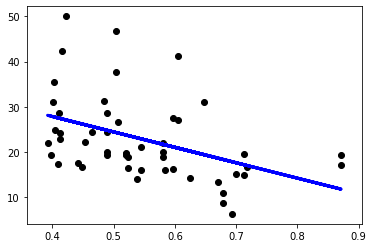

In [97]:
plt.scatter(x_test_try, y_test_try,  color='black')
plt.plot(x_test_try, regr.predict(x_test_try), color='blue', linewidth=3)
plt.show()

In [98]:
#觀察正相關特徵
X_try2 = X['RM']
X_try2 = X_try2[:, np.newaxis]
# 切分訓練集/測試集
x_train_try2, x_test_try2, y_train_try2, y_test_try2 = train_test_split(X_try2, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()
regr.fit(x_train_try2, y_train_try2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

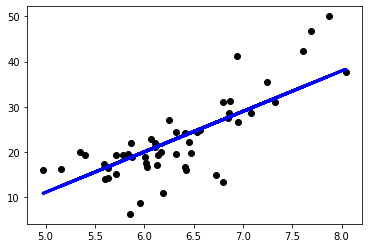

In [99]:
plt.scatter(x_test_try2, y_test_try2,  color='black')
plt.plot(x_test_try2, regr.predict(x_test_try2), color='blue', linewidth=3)
plt.show()